In [55]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF
from pathlib import Path
# import utils


In [127]:
glove_pathth

PosixPath('/Users/smap10/Project/aspect-extraction/embedding_weights/glove.840B.300d.txt')

In [126]:
# read glove to embedings_index
from tqdm import tqdm

glove_path = Path.

embeddings_index = {}
with open(glove_path, encoding='utf8') as f:
    for i, line in tqdm(enumerate(f)):
        values = line.split()
        word = ''.join(values[:-300])
        coefs = np.asarray(values[-300:], dtype='float32')
        embeddings_index[word] = coefs


0it [00:00, ?it/s]
407it [00:00, 3991.96it/s]
1123it [00:00, 5574.28it/s]
1824it [00:00, 6045.14it/s]
2808it [00:00, 6989.47it/s]
3673it [00:00, 7314.47it/s]
4637it [00:00, 7705.33it/s]
5568it [00:00, 7930.90it/s]
6379it [00:00, 7796.52it/s]
7285it [00:00, 7933.24it/s]
8251it [00:01, 8102.68it/s]
9334it [00:01, 8342.13it/s]
10260it [00:01, 8366.11it/s]
11287it [00:01, 8497.13it/s]
12224it [00:01, 8439.04it/s]
13115it [00:01, 8450.05it/s]
13996it [00:01, 8444.98it/s]
14866it [00:01, 8459.61it/s]
15734it [00:01, 8442.48it/s]
16688it [00:01, 8498.40it/s]
17571it [00:02, 8474.06it/s]
18431it [00:02, 8466.05it/s]
19282it [00:02, 8451.49it/s]
20122it [00:02, 8401.12it/s]
20932it [00:02, 8368.53it/s]
21728it [00:02, 8322.33it/s]
22505it [00:02, 8297.18it/s]
23425it [00:02, 8326.19it/s]
24240it [00:02, 8314.89it/s]
25091it [00:03, 8320.64it/s]
26028it [00:03, 8354.33it/s]
26946it [00:03, 8379.62it/s]
27844it [00:03, 8396.20it/s]
28880it [00:03, 8453.71it/s]
29939it [00:03, 8514.60it/s]
30906i

558900it [00:51, 10764.76it/s]
560012it [00:52, 10763.27it/s]
561367it [00:52, 10768.69it/s]
562750it [00:52, 10774.53it/s]
563979it [00:52, 10776.41it/s]
565196it [00:52, 10778.86it/s]
566682it [00:52, 10786.64it/s]
567973it [00:52, 10790.39it/s]
569285it [00:52, 10794.75it/s]
570579it [00:52, 10795.32it/s]
571816it [00:52, 10797.96it/s]
573165it [00:53, 10802.99it/s]
574431it [00:53, 10804.75it/s]
575726it [00:53, 10808.77it/s]
577050it [00:53, 10813.26it/s]
578325it [00:53, 10815.84it/s]
579692it [00:53, 10821.18it/s]
581128it [00:53, 10827.70it/s]
582576it [00:53, 10834.47it/s]
583943it [00:53, 10836.71it/s]
585257it [00:53, 10840.69it/s]
586642it [00:54, 10846.30it/s]
588006it [00:54, 10851.31it/s]
589347it [00:54, 10856.02it/s]
590687it [00:54, 10857.88it/s]
592029it [00:54, 10862.60it/s]
593386it [00:54, 10867.52it/s]
594707it [00:54, 10869.60it/s]
596035it [00:54, 10874.09it/s]
597331it [00:54, 10874.54it/s]
598572it [00:55, 10876.65it/s]
599878it [00:55, 10880.65it/s]
601268it

1141314it [01:44, 10968.00it/s]
1142024it [01:44, 10959.31it/s]
1142763it [01:44, 10955.91it/s]
1143819it [01:44, 10955.51it/s]
1144907it [01:44, 10955.44it/s]
1146066it [01:44, 10956.04it/s]
1147068it [01:44, 10955.14it/s]
1148124it [01:44, 10954.76it/s]
1149122it [01:44, 10953.18it/s]
1150269it [01:45, 10953.67it/s]
1151362it [01:45, 10953.57it/s]
1152482it [01:45, 10953.83it/s]
1153552it [01:45, 10953.12it/s]
1154610it [01:45, 10952.59it/s]
1155755it [01:45, 10953.04it/s]
1156834it [01:45, 10951.34it/s]
1157984it [01:45, 10951.88it/s]
1159099it [01:45, 10952.04it/s]
1160183it [01:45, 10951.48it/s]
1161252it [01:46, 10945.58it/s]
1162210it [01:46, 10943.55it/s]
1163360it [01:46, 10944.10it/s]
1164360it [01:46, 10943.11it/s]
1165358it [01:46, 10941.89it/s]
1166622it [01:46, 10943.46it/s]
1167911it [01:46, 10945.28it/s]
1169143it [01:46, 10946.55it/s]
1170443it [01:46, 10948.47it/s]
1171664it [01:47, 10949.65it/s]
1172874it [01:47, 10947.27it/s]
1173995it [01:47, 10945.77it/s]
1175094i

1775244it [02:32, 11622.17it/s]
1776724it [02:32, 11624.24it/s]
1778160it [02:32, 11626.05it/s]
1779561it [02:33, 11626.76it/s]
1780921it [02:33, 11627.83it/s]
1782388it [02:33, 11629.76it/s]
1783781it [02:33, 11631.28it/s]
1785171it [02:33, 11630.99it/s]
1786496it [02:33, 11631.93it/s]
1787953it [02:33, 11633.86it/s]
1789439it [02:33, 11635.90it/s]
1790872it [02:33, 11637.65it/s]
1792273it [02:34, 11637.70it/s]
1793604it [02:34, 11638.70it/s]
1794933it [02:34, 11639.59it/s]
1796314it [02:34, 11641.01it/s]
1797782it [02:34, 11642.96it/s]
1799158it [02:34, 11642.27it/s]
1800517it [02:34, 11643.55it/s]
1802017it [02:34, 11645.68it/s]
1803384it [02:34, 11646.98it/s]
1804792it [02:34, 11648.48it/s]
1806249it [02:35, 11650.43it/s]
1807712it [02:35, 11652.34it/s]
1809219it [02:35, 11654.54it/s]
1810665it [02:35, 11656.12it/s]
1812097it [02:35, 11656.64it/s]
1813493it [02:35, 11658.14it/s]
1814930it [02:35, 11659.86it/s]
1816351it [02:35, 11661.49it/s]
1817756it [02:35, 11662.89it/s]
1819152i

In [56]:
train_path = Path.cwd().parent.joinpath('data/semeval-2016/train.csv')
test_path = Path.cwd().parent.joinpath('data/semeval-2016/test.csv')
print(train_path)
print(test_path)

/Users/smap10/Project/aspect-extraction/data/semeval-2016/train.csv
/Users/smap10/Project/aspect-extraction/data/semeval-2016/test.csv


In [57]:
# Read data
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

In [58]:
data_train.tail()

,Sentence #,Tag,Word
28641,2000,O,would
28642,2000,O,retrain
28643,2000,O,the
28644,2000,B,staff
28645,2000,O,.


In [59]:
data_test.tail()

,Sentence #,Tag,Word
9864,676,O,was
9865,676,O,good
9866,676,O,","
9867,676,O,too
9868,676,O,.


In [60]:
{1, 4, 5} and {1, 8, 9}

{1, 8, 9}

In [119]:
# Vocab
word_train = set(data_train['Word'].values)
word_test = set(data_test['Word'].values)
words = list(word_train or word_test)

In [120]:
word_true = 0

for word in words:
    if word in embeddings_index:
        word_true += 1

In [121]:
print(len(words))
print(word_true)

3599
3190


In [122]:
word2idx = {}
word2idx['<PAD>'] = 0
word2idx['<UNK>'] = 1
for i, word in enumerate(words):
    word2idx[word] = i + 2

In [123]:
print_dict(word2idx)

('<PAD>', 0)
('<UNK>', 1)
('puree', 2)
('working', 3)
('friend', 4)


In [124]:
word2idx['judging']

534

In [125]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [128]:
EMBEDDING_DIM = 300

embedding_matrix = np.zeros((len(words)+2, EMBEDDING_DIM))

for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is None:
        embedding_matrix[i] = embeddings_index['unk']
    else:
        embedding_matrix[i] = embedding_vector

# embedding_matrix[0] is all zeros for padding
embedding_matrix[0] = np.zeros(EMBEDDING_DIM)

In [129]:
embedding_matrix.shape

(3601, 300)

In [130]:
'unk' in embeddings_index

True

In [132]:
len(word2idx)

3601

In [159]:
data = data_train

# Save all words as a list
max_len = 75
n_words = len(word2idx)
tags = list(set(data["Tag"].values))
n_tags = len(tags)

tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx['<pad>'] = 0
n_tags = len(tag2idx) # Due to <pad>, here total tag number is from 17 to 18


# Sentence class
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
#                                                            s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

getter = SentenceGetter(data)
sentences = getter.sentences # get all sentences


In [160]:
sentences[0]

[('judging', 'O'),
 ('from', 'O'),
 ('previous', 'O'),
 ('posts', 'O'),
 ('this', 'O'),
 ('used', 'O'),
 ('to', 'O'),
 ('be', 'O'),
 ('a', 'B'),
 ('good', 'O'),
 ('place', 'B'),
 (',', 'O'),
 ('but', 'O'),
 ('not', 'O'),
 ('any', 'O'),
 ('longer', 'O'),
 ('.', 'O')]

In [142]:
# X = [[word2idx.get(w[0], 1) for w in s] for s in sentences]

In [143]:
# Word2inx & Padding for X
X = [[word2idx[w[0]] for w in s] for s in sentences]
X_train = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)

# Word2inx & Padding for y
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=0)

# Get one-hot labels
y_train = [to_categorical(i, num_classes=n_tags) for i in y]

In [147]:
print(X[0])

[534, 1290, 1686, 674, 586, 2500, 2930, 2509, 477, 1117, 334, 3111, 514, 2437, 286, 1831, 1415]


In [144]:
print(len(X_train))
print(len(y_train))

2000
2000


In [145]:
n_words

3601

In [149]:
#==============Bi-LSTM CRF=============
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, 
                  output_dim=300,
                  weights=[embedding_matrix],
                  input_length=max_len, 
                  mask_zero=True)(input)  # 20-dim embedding
model = Bidirectional(LSTM(units=256, return_sequences=True,
                           recurrent_dropout=0.1))(model)  # variational biLSTM
model = TimeDistributed(Dense(50, activation="tanh"))(model)  # a dense layer as suggested by neuralNer
crf = CRF(n_tags)  # CRF layer
out = crf(model)  # output

model = Model(input, out)
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 75, 300)           1080300   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 75, 512)           1140736   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 75, 50)            25650     
_________________________________________________________________
crf_2 (CRF)                  (None, 75, 4)             228       
Total params: 2,246,914
Trainable params: 2,246,914
Non-trainable params: 0
_________________________________________________________________


In [150]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=8,
                    validation_split=0.1, verbose=1)

Train on 1800 samples, validate on 200 samples
Epoch 1/8
1800/1800 [==============================] - 31s 17ms/step - loss: 9.9829 - acc: 0.8949 - val_loss: 10.0079 - val_acc: 0.9248
Epoch 2/8
1800/1800 [==============================] - 28s 15ms/step - loss: 9.8740 - acc: 0.9299 - val_loss: 9.9858 - val_acc: 0.9370
Epoch 3/8
1800/1800 [==============================] - 28s 16ms/step - loss: 9.8353 - acc: 0.9427 - val_loss: 9.9867 - val_acc: 0.9335
Epoch 4/8
1800/1800 [==============================] - 27s 15ms/step - loss: 9.8077 - acc: 0.9525 - val_loss: 9.9812 - val_acc: 0.9369
Epoch 5/8
1800/1800 [==============================] - 26s 15ms/step - loss: 9.7867 - acc: 0.9595 - val_loss: 9.9628 - val_acc: 0.9433
Epoch 6/8
1800/1800 [==============================] - 29s 16ms/step - loss: 9.7701 - acc: 0.9652 - val_loss: 10.0092 - val_acc: 0.9278
Epoch 7/8
1800/1800 [==============================] - 27s 15ms/step - loss: 9.7528 - acc: 0.9719 - val_loss: 9.9990 - val_acc: 0.9361
Epoch 

In [152]:
hist = pd.DataFrame(history.history)

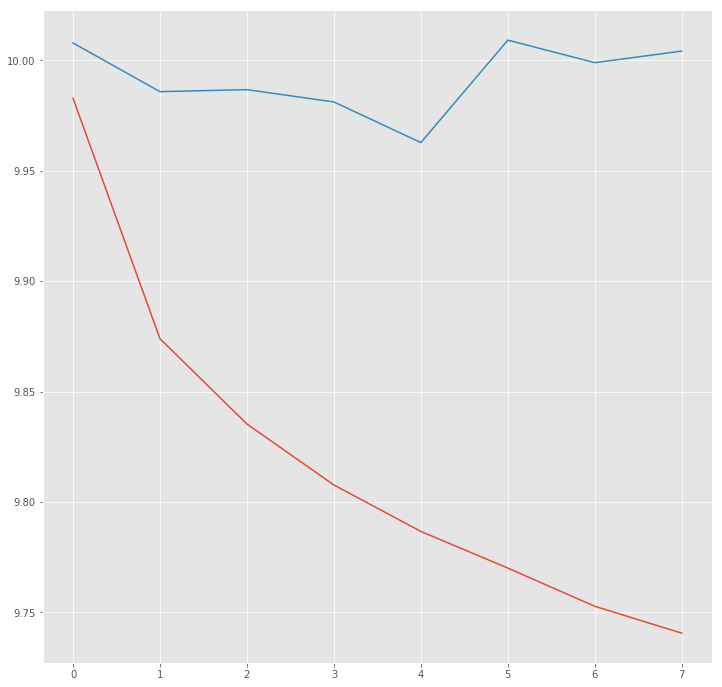

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.show()

# predict on test dataset

In [154]:
data = data_test

# Sentence class
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
#                                                            s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

getter = SentenceGetter(data)
sentences = getter.sentences # get all sentences
   
# Word2inx & Padding for X
X = [[word2idx.get(w[0], 1) for w in s] for s in sentences]
X_test = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)

# Word2inx & Padding for y
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=0)

# Get one-hot labels
y_test = [to_categorical(i, num_classes=n_tags) for i in y]

In [155]:
print(sentences[1])
print(X_test[1])
print(np.argmax(y_test[1], -1))

[('serves', 'O'), ('really', 'O'), ('good', 'O'), ('sushi', 'B'), ('.', 'O')]
[1632 1491 1117 3192 1415    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
[1 1 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [156]:
# Predictions.
idx2word = {value: key for key, value in word2idx.items()}
idx2tag = {value: key for key, value in tag2idx.items()}


true_all = np.argmax(y_test, -1)

true_all_tags = [[idx2tag[idx] for idx in s if idx!=0] for s in true_all]

p_all = model.predict(np.array(X_test)) # (4796, 75, 18)
p_all= np.argmax(p_all, axis=-1) # (4796, 75)
p_all_tags = [[idx2tag[idx] for idx in s] for s in p_all] # ['B-gpe', 'O', 'O', 'O']

for i, true in enumerate(true_all_tags):
    length = len(true)
    p_all_tags[i] = p_all_tags[i][:length]

p_all_tags = [[x.replace('<pad>', 'O') for x in s] for s in p_all_tags]

# for (true_tag, p)

print(sentences[3])
print(X_test[3])
print(true_all_tags[3])
print(p_all_tags[3])

[('green', 'B'), ('tea', 'I'), ('creme', 'I'), ('brulee', 'I'), ('is', 'O'), ('a', 'B'), ('must', 'O'), ('!', 'O')]
[3428 2036    1    1 1808  477  473 2469    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
['B', 'I', 'I', 'I', 'O', 'B', 'O', 'O']
['B', 'I', 'I', 'O', 'O', 'B', 'O', 'O']


In [157]:
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(sentences[3], true_all_tags[3], p_all_tags[3]):
    if w != 0:
        print("{:15}: {:5} {}".format(w[0], w[1], pred))


Word           ||True ||Pred
green          : B     B
tea            : I     I
creme          : I     I
brulee         : I     O
is             : O     O
a              : B     B
must           : O     O
!              : O     O


In [158]:
# Evaluation
from seqeval.metrics import f1_score, classification_report
print(f1_score(true_all_tags, p_all_tags))
print(classification_report(true_all_tags, p_all_tags))


0.5335994677312043
             precision    recall  f1-score   support

          B       0.64      0.43      0.51       599
          I       0.62      0.53      0.57       269

avg / total       0.63      0.46      0.53       868

